<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Dirbtiniai_neuroniniai_tinklai_eksperimentai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Truputį apie Neuroninius tinklus

*keras* yra aukšto lygio sąsaja/"interfeisas"  su *tensorflow* biblioteka kuri valdo ir atlieka žemo lygio skaičiavimus. Neuroninio tinklo architektūra , parametrai ir mokymo algoritmas yra formuluojami per *keras* funkcijas ir tos užduotys/algoritmas perduodamas vykdyti *tensorflow*

Paveiksliukas iš **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron Published by O'Reilly Media, Inc., 2019**

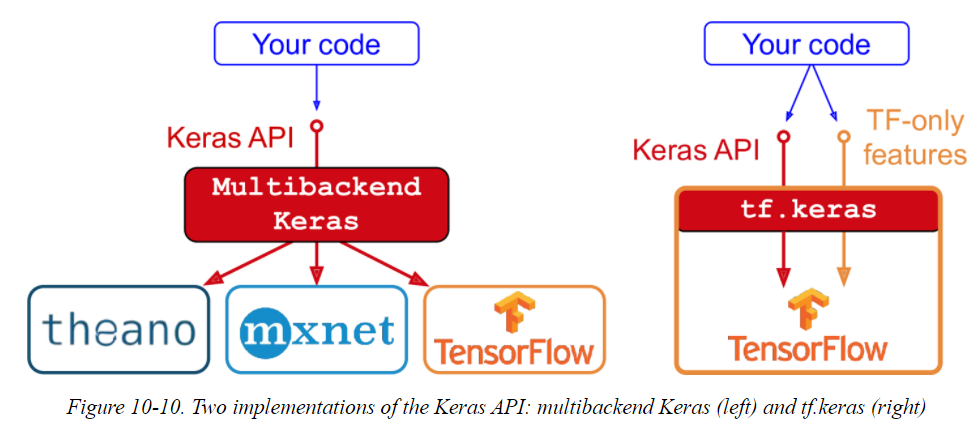

In [5]:
import tensorflow as tf
tf.add(1, 2).numpy()
from tensorflow import keras
tf.__version__
#keras.__version__


'2.3.0'

In [6]:
tf.keras?

Iš tos pačios knygos panagrinėsim pavyzdį su "Fashion MNIST" 

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

Suformuojama validavimo aibė ir paveiksliukų požymiai-pikseliai-  sunormalizuojami iš intervalo [0-255] į intervalą [0-1] 

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

Klasėm suteikiam vardus

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Mokymo aibės pirmas paveiksliukas yra 'Coat' 

In [13]:
class_names[y_train[0]]

'Coat'

Čia parodyta kokie yra paveiksliukai ir jų klasės 'Fashion MNIST'

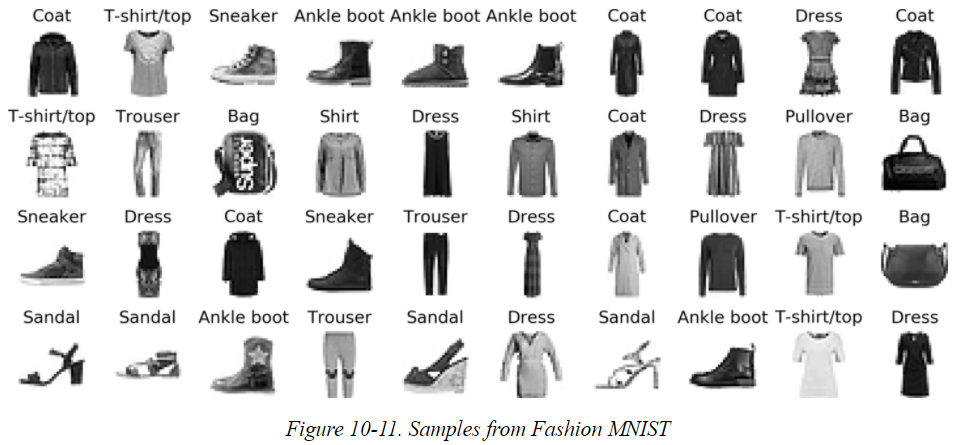

Konstruojamas daugiasluoksnis perceptronas

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten sluoksnis transformuoja paveiksliuka i vektoriu
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Tinklo sluoksniai

In [19]:
model.layers
hidden1=model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

Visi sluoksnio parametrai gaunami su get_weights() ir set_weights() 

In [20]:
weights, biases = hidden1.get_weights()
weights


array([[-0.05569922, -0.04209766, -0.05101726, ..., -0.01252628,
         0.02975273, -0.06452336],
       [-0.05481157,  0.05445558,  0.00606335, ...,  0.07258958,
         0.0219356 , -0.01845244],
       [-0.05716854, -0.07336698,  0.00033426, ...,  0.06424177,
        -0.05764884,  0.0529843 ],
       ...,
       [-0.06807417, -0.02791287,  0.0618801 , ...,  0.06650175,
         0.04033928,  0.06332408],
       [-0.03944359,  0.02262978, -0.07108007, ..., -0.01954222,
         0.01419733, -0.03154975],
       [ 0.03075856,  0.04667839,  0.04415851, ..., -0.04053293,
         0.01408907,  0.04128092]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

Kada neuroninio tinklo modelis yra sukurtas, reikia jį sukompiliuoti nurodyti kriterijų "los function" ir "optimizatorių" , galima nurodyti daugiau metrikų kompilatoriui. Daugiau informacijos apie šiuos parametrus yra 

*   https://keras.io/losses
*   https://keras.io/optimizers
*   https://keras.io/metrics



In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) #sgd is stochastic gradient descent

Mokymas ir modelio įvertinimas

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7197 - accuracy: 0.7597 - val_loss: 0.4942 - val_accuracy: 0.8414
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4887 - accuracy: 0.8299 - val_loss: 0.4669 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4432 - accuracy: 0.8446 - val_loss: 0.4118 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8526 - val_loss: 0.4258 - val_accuracy: 0.8546
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3950 - accuracy: 0.8589 - val_loss: 0.3977 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.3819 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8701 - val_loss: 0.3649 - val_accuracy:

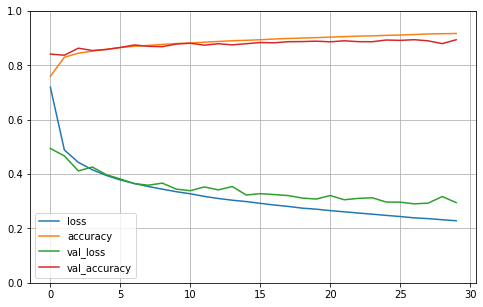

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8808


[0.3321411609649658, 0.8808000087738037]

### Tinklo panaudojimas klasifikavimui

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Prognozės visoms klasėms, bet naudingiau gauti klasės numerį iš karto

In [32]:
import numpy as np
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
X_test[:1]

Kaip išsivesti paveiksliuką iš X_test ar X_train? 